# Proekt fizykochemia

In [12]:
import csv
with open('in.txt', 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    temp_c_c = []
    temp_c = []
    c_p = []
    for temp_c_, c_p_ in reader:
        temp_c_c.append(float(temp_c_))
        temp_c.append(float(temp_c_) + 273.15)
        c_p.append(float(c_p_))

In [3]:
import matplotlib.pyplot as plt
import numpy as np

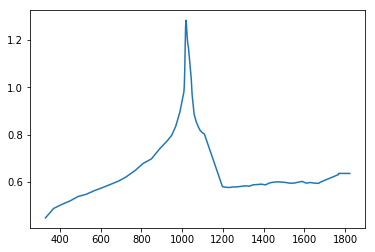

In [5]:
plt.plot(temp_c, c_p)

In [6]:
l = len(temp_c)

In [39]:
h = [temp_c[0]*c_p[0]]
for i in range(1, l):
    h.append( h[i-1] + (temp_c[i] - temp_c[i-1])*(c_p[i] + c_p[i-1])/2 )
    # h.append( h[i-1] + (c_p[i] - c_p[i-1])/temp_c[i] )

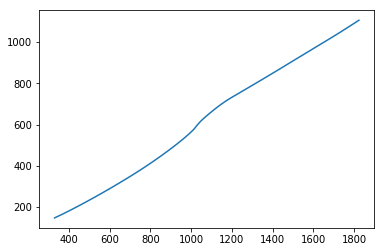

In [40]:
plt.plot(temp_c, h)

In [47]:
h[-1]

1105.7644290000003

In [53]:
import scipy.interpolate
c_p_from_T = scipy.interpolate.interp1d(temp_c, c_p)
H_from_T = scipy.interpolate.interp1d(temp_c, h)

In [102]:
c_p_from_T(1000)

array(0.94327305)

In [64]:
# input

t_1 = 500
t_2 = 700
t_d = 0

ent = 150

def in_h_from_T(T):
    return ent/(t_2-t_1)

array(0.59901635)

In [60]:
r_iterator = iter(range(t_1, t_2))
out_h = [H_from_T(next(r_iterator))]
for T in r_iterator:
    out_h.append( out_h[i-1] + in_h_from_T(T) + (temp_c[i] - temp_c[i-1])*(c_p[i] + c_p[i-1])/2 )
    

IndexError: list index out of range

In [61]:
in_temp_c = list(range(t_1, t_2))
in_l = len(in_temp_c)
in_h = [ent/(t_2-t_1)] * in_l
out_h = [H_from_T(next(r_iterator))]
for i in range(1, in_l):
    out_h.append(
        out_h[i-1],
        in_h,
        
    )

In [100]:
def i_h_f(T):
    if T>=t_1 and T<t_2:
        return ent/(t_2-t_1)
    else:
        return 0

from math import ceil

i_T = list(
    range(int(ceil(temp_c[0])), int(temp_c[-1]))
)
i_l = len(i_T)

i_H = [H_from_T(i_T[0])]
for i in range(1, i_l):
    i_H.append(
        i_H[i-1] +
        i_h_f(i) +
        c_p_from_T(i_T[i]) * (i_T[i] - i_T[i-1])
    )

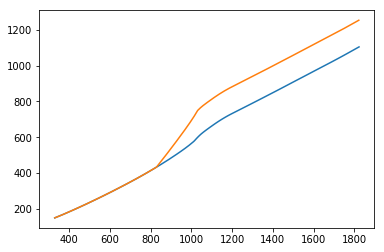

In [101]:
plt.plot(temp_c, h)
plt.plot(i_T, i_H)

In [104]:
from typing import Callable, Iterator


def calculate(c: Callable, h: Callable, T: Iterator):
    # c(t) - Ciepło właściwe w danej temperaturze
    # h(t) - Całkowita dodana entalpia użytkownika w danej temperaturze
    t_0 = next(T)
    H = [c(t)*h(t)]  # Entalpia
    t_p = t_0  # Poprzednia wartość t
    for t_n in T:
        H.append(
            H[-1] +  # Poprzednia entalpia
            h(t_n) - h(t_p) +  # Wartość dodanej entalpi użytkownika w danej temperaturze
            c((t_n + t_p)/2) * (t_n - t_p)  # Całka C_p * Delta T
        )
        t_p = t_n
    
